## <font color=blue> Stats507-001 , WI 2019</font>
### Zizhao Zhang
#### zizhaoz@umich.edu
***

Time spent on problems(hours):   *Problem 1*: 0.5 , *Problem 2*: 1  *Problem 3*: 1.5 

***

Persons discussed idea about: None

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skellam
from scipy.stats.stats import pearsonr   

### Problem 1: Warmup: constructing pandas objects (2 points)

#### 1.1:
Create a **pandas** Series object with indices given by the first 10 letters of the English
alphabet and values given by the first 10 primes.

In [2]:
####Ascii generated alphabet
alphabet = [chr(i) for i in range(97,123)]
primes_10 = [x for x in range(2, 30) if not 0 in map(lambda z : x % z, range(2,x))]

In [3]:
pd.Series(primes_10,index = alphabet[:10])

a     2
b     3
c     5
d     7
e    11
f    13
g    17
h    19
i    23
j    29
dtype: int64

#### 1.2:
Below is a table that might arise in a genetics experiment. Reconstruct this as a
pandas DataFrame <img src="./pandas_sample.png" width="400" height = "300"/>

In [4]:
index_group = [['goat']*4+['bird']*4+['llama']*4,
          ['A', 'A', 'a', 'a']*3, ['A','a']*6 ]
index = pd.MultiIndex.from_arrays(index_group, names=['animal', 'parent1','parent2'])
pd.DataFrame({'score1': list(range(1,13)),
                   'score2': [i+1 if i%2 else i+2 for i in range(1,13)]},
                  index=index)

score1  score2
animal parent1 parent2                
goat   A       A             1       2
               a             2       4
       a       A             3       4
               a             4       6
bird   A       A             5       6
               a             6       8
       a       A             7       8
               a             8      10
llama  A       A             9      10
               a            10      12
       a       A            11      12
               a            12      14

### Problem 2: Working with pandas DataFrames (3 points)

#### 2.1: 
Download the iris data set from the link above. Please include this file in your
submission. Read **iris.csv** into Python as a **pandas** DataFrame. Note that the
CSV file includes column headers. 
1. *How many data points are there in this data set?*

2. *What are the data types of the columns? What are the column names?*
3. *The column names correspond to flower species names, as well as four basic measurements one can make of a flower: the width and length of its petals and the width and length of its sepal (the part of the pant that supports and protects the flower itself).*
4. *How many species of flower are included in the data?*

In [5]:
iris = pd.read_csv('./iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
iris.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Answers to 2.1:
   **How many data points are there in this data set?**
    1. The shape of the data frame is 150 * 5, with column headers excluded, hence 150 data points.
***
   **What are the data types of the columns? What are the column names?**
    2&3. By calling "iris[:0]", the column names are given as below:
    "Sepal.Length","Sepal.Width", "Petal.Length", "Petal.Width", "Species", 
    The first 4 columns' data types are float64, and "Species"'s data types are object
***
   **How many species of flower are included in the data?**
    4. By calling "iris.Species.unique()", there are three species of flower: ['setosa', 'versicolor', 'virginica']

#### 2.2:
correct the typo/errors according to the instruction.


In [7]:
iris.at[34,"Petal.Width"] = 0.2
iris.at[37,"Sepal.Width"] = 3.6
iris.at[37,"Petal.Length"] = 1.4

In [8]:
iris.iloc[[34,37]]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
34,4.9,3.1,1.5,0.2,setosa
37,4.9,3.6,1.4,0.1,setosa


#### 2.3: 
 The iris dataset is commonly used in machine learning as a proving ground for
clustering and classification algorithms. Some researchers have found it useful to
use two additional features, called **Petal ratio and Sepal ratio**, defined as the ratio
of the petal length to petal width and the ratio of the sepal length to sepal width,
respectively. Add two columns to you DataFrame corresponding to these two new
features. Name these columns Petal.Ratio and Sepal.Ratio, respectively.

In [9]:
iris["Petal.Ratio"] = (iris["Petal.Length"]/iris["Petal.Width"])
iris["Sepal.Ratio"] = (iris["Sepal.Length"]/iris["Sepal.Width"])

In [10]:
iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Petal.Ratio,Sepal.Ratio
0,5.1,3.5,1.4,0.2,setosa,7.0,1.457143
1,4.9,3.0,1.4,0.2,setosa,7.0,1.633333
2,4.7,3.2,1.3,0.2,setosa,6.5,1.468750


#### 2.4:
Save your corrected and extended iris DataFrame to a csv file called **iris_corrected.csv**.
Please include this file in your submission.

In [11]:
iris.to_csv("./iris_corrected.csv", index = False)

#### 2.5:
Use a **pandas** aggregate operation to determine the mean, median, minimum, maximum and standard deviation of the petal and sepal ratio for each of the three species
in the data set. Note: you should be able to get all of these numbers in a single
table (indeed, in a single line of code) using a well-chosen group-by or aggregate
operation

In [12]:
iris[iris.columns[4:7]].groupby("Species").agg({"Petal.Ratio": ["mean","median",min,max,"std"],
                                                "Sepal.Ratio":["mean","median",min,max,"std"]})

Petal.Ratio                                     Sepal.Ratio  \
                  mean    median       min   max       std        mean   
Species                                                                  
setosa        6.908000  7.000000  2.666667  15.0  2.854545    1.470188   
versicolor    3.242837  3.240385  2.666667   4.1  0.312456    2.160402   
virginica     2.780662  2.666667  2.125000   4.0  0.407367    2.230453   

                                                    
              median       min       max       std  
Species                                             
setosa      1.463063  1.268293  1.956522  0.118750  
versicolor  2.161290  1.764706  2.818182  0.228658  
virginica   2.169540  1.823529  2.961538  0.246992

### Problem 3: Plotting Dataframes: Major League Baseball (5 points)

#### 3.1: 
Read the data into a table called **mlb_df**. Each row of the table represents the
outcome of a single game from the 2018 MLB season. Take note that the file does
not have columns names; see the header keyword to the pandas.read_csv function.
The columns are explained in a .txt file which you can download from https://www.retrosheet.org/gamelogs/glfields.txt, but we will only make use of a few of
them in this problem. The 10-th and 11-th columns (using 1-indexing) are the scores
of the visiting and home teams, respectively. Rename these columns v_score and
h_score, respectively. MLB comprises two leagues, the American League and the
National League, encoded as AL and NL in the table. The 5-th and 8-th columns
(also 1-indexed) are the league affiliations of the visiting and home team, respectively.
Rename these columns v_league and h_league.

In [13]:
mlb_df = pd.read_csv("./gl2018.zip" , header = None)
mlb_df = mlb_df.rename({9:"v_score",10:"h_score",4:"v_league",7:"h_league"}, axis = "columns")

In [14]:
mlb_df[mlb_df.columns[3:11]].head(3)

,3,v_league,5,6,h_league,8,v_score,h_score
0,COL,NL,1,ARI,NL,1,2,8
1,PHI,NL,1,ATL,NL,1,5,8
2,SFN,NL,1,LAN,NL,1,1,0


#### 3.2: 
Create a plot with two subplots, placed side-by-side. Each subplot should be a
scatter plot in which the x- and y-axes correspond to the home and visitor scores,
respectively, and in which each point corresponds to a game from the season. In the
left-hand plot, include all games in which both teams were in the NL, and in the righthand plot, include all games in which both teams were in the AL. Games in which
the teams were from different leagues should be ignored. Specify the transparency
(cf. the alpha parameter in the matplotlib documentation) so that scores that
occur more often will be shaded darker than rare scores. Color the points in the
scatter plot according to the league affiliation of the two teams as follows: games
between two teams both in the AL should be rendered as red points in the scatter
plot. Games between two teams both in the NL should be rendered as blue points
in the scatter plot. Label your axes and provide an appropriate title for your plot
as well as its subplots. **Note**: *you may find it useful to create an extra column in
the data frame encoding whether a given game is AL vs AL, NL vs NL or mixed.*

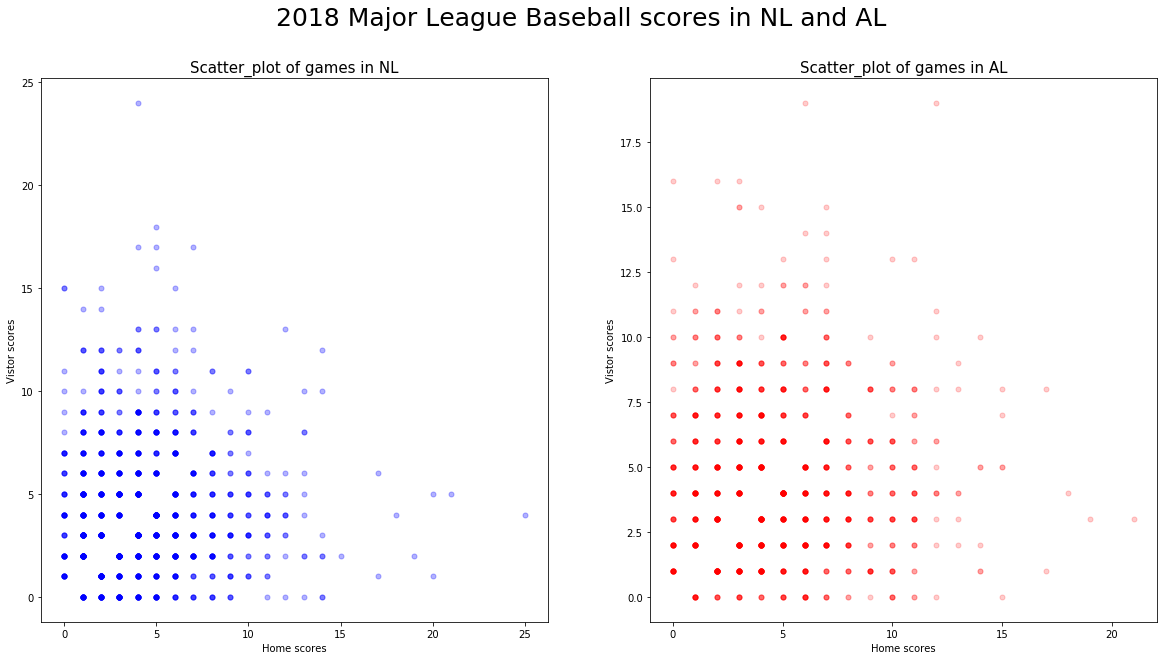

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
####getting the left with all NL
x_left = mlb_df[(mlb_df["v_league"] == "NL")& (mlb_df["h_league"] == "NL")]["h_score"]
y_left = mlb_df[(mlb_df["v_league"] == "NL")& (mlb_df["h_league"] == "NL")]["v_score"]
plt.scatter(x_left,y_left, s = 25, alpha = 0.3,marker = "o",color = "blue")
plt.xlabel("Home scores")
plt.ylabel("Vistor scores")
plt.title('Scatter_plot of games in NL',fontsize = 15)
plt.subplot(1,2,2)
x_right = mlb_df[(mlb_df["v_league"] == "AL")& (mlb_df["h_league"] == "AL")]["h_score"]
y_right = mlb_df[(mlb_df["v_league"] == "AL")& (mlb_df["h_league"] == "AL")]["v_score"]
# A more frequent dot will appear darker/less transparent if alpha is smaller than 1:
plt.scatter(x_right,y_right, s = 25, alpha = 0.2,marker = "o",color = "red")
plt.xlabel("Home scores")
plt.ylabel("Vistor scores")
plt.title('Scatter_plot of games in AL',fontsize = 15)
plt.suptitle("2018 Major League Baseball scores in NL and AL", fontsize=25)
_ = plt.show()

#### 3.3:
The Skellam distribution (https://en.wikipedia.org/wiki/Skellam_distribution)
is the distribution that results from taking the difference between two Poisson random variables. It is often suggested as a model for the difference between scores
in sports games, particularly baseball. Add a new column to the data frame called
**score_diff**, given by the home score minus the away score. Make a histogram of
this score difference and give the plot an appropriate title.

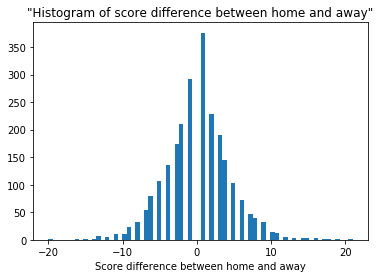

In [16]:
mlb_df["score_diff"] = mlb_df["h_score"]-mlb_df["v_score"]
plt.hist(mlb_df["score_diff"],bins = 70)
plt.xlabel("Score difference between home and away")
plt.title('"Histogram of score difference between home and away"')
_ = plt.show()

#### 3.4:
$$
\begin{array} { l } { \text { Estimate parameters } \hat { \lambda } _ { H } \text { and } \hat { \lambda } _ { V } \text { as the means of the home and visitor scores, respec- } } \\ { \text { tively. Use scipy to run a Kolmogorov-Smirnov test assessing whether or not the } } \\ { \text { Skellam distribution with parameters } \left( \mu _ { 1 } , \mu _ { 2 } \right) = \left( \hat { \lambda } _ { H } , \hat { \lambda } _ { V } \right) \text { and location parameter } 0 \text { is a good fit for the score differences. } } \end{array}
$$

In [56]:
from scipy.stats import kstest
lambda_H_hat,lambda_V_hat = mlb_df["h_score"].mean(),mlb_df["v_score"].mean()
mu1,mu2 = lambda_H_hat,lambda_V_hat

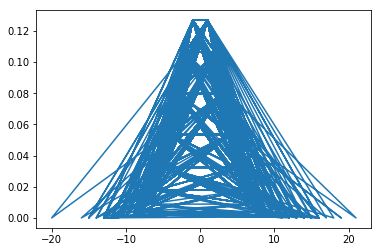

In [71]:
plt.plot(mlb_df["score_diff"],
         skellam.pmf(mlb_df["score_diff"], 
        lambda_H_hat, lambda_H_hat, loc = 0))
_=plt.show()
####looks like a good fit

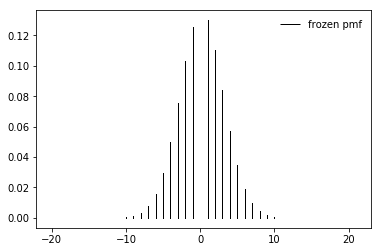

In [72]:
fig, ax = plt.subplots(1, 1)
rv = skellam(lambda_H_hat,lambda_V_hat)
ax.vlines(mlb_df["score_diff"], 0, rv.pmf(mlb_df["score_diff"]),
          colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
_ = plt.show()

In the one-sided test, the alternative is that the empirical cumulative distribution function of the random variable is “less” or “greater” than the cumulative distribution function F(x) of the hypothesis, G(x)<=F(x), resp. G(x)>=F(x).

In [62]:
###claim our significance level to be 0.05, which is our alpha
np.random.seed(987654321)
###kstest against skellam with loc param at 0 

#-----------------------one-sided alternative-------------------------------#
print("alternative greater: " + str(kstest(mlb_df["score_diff"], "skellam", 
                               args = (mu1,mu2,0), alternative= "greater")))
print("alternative less: " + str(kstest(mlb_df["score_diff"], "skellam", 
                               args = (mu1,mu2,0), alternative= "less")))
#-----------------------two-sided alternative-------------------------------#
print("two-side test: " + str(kstest(mlb_df["score_diff"], "skellam", 
                               args = (mu1,mu2,0))))

#note both test statistics showing that reject the null-hypothesis that a skellam 
#distribution would model the data samples well.

alternative greater: KstestResult(statistic=0.08664448042477839, pvalue=1.1102230246251565e-16)
alternative less: KstestResult(statistic=0.2052406383420739, pvalue=0.0)
two-side test: KstestResult(statistic=0.2052406383420739, pvalue=0.0)


trying with new mu_1, and mu_2, where $$
 \mu _ { 1 } = \lambda _ { 1 } - \rho \sqrt { \lambda _ { 1 } \lambda _ { 2 } } \text { and } \mu _ { 2 } = \lambda _ { 2 } - \rho \sqrt { \lambda _ { 1 } \lambda _ { 2 } }
$$

In [ ]:
###claim our significance level to be 0.05, which is our alpha
np.random.seed(987654321)
#####estimate mu1 and mu2 based on our lambda hats
rho = pearsonr(mlb_df["h_score"],mlb_df["v_score"])[0]
mu_1 = lambda_H_hat - rho*np.sqrt(lambda_H_hat*lambda_V_hat)
mu_2 = lambda_V_hat - rho*np.sqrt(lambda_H_hat*lambda_V_hat)
###kstest against skellam with loc param at 0 

#-----------------------one-sided alternative-------------------------------#
print("alternative greater: " + str(kstest(mlb_df["score_diff"], "skellam", 
                               args = (mu_1,mu_2,0), alternative= "greater")))
print("alternative less: " + str(kstest(mlb_df["score_diff"], "skellam", 
                               args = (mu_1,mu_2,0), alternative= "less")))
#-----------------------two-sided alternative-------------------------------#
print("two-side test: " + str(kstest(mlb_df["score_diff"], "skellam", 
                               args = (mu_1,mu_2,0))))
#note both test statistics showing that reject the null-hypothesis that a skellam 
#distribution would model the data samples well.

### explaination & Answers :

From above p-vals (super low) and attempt of re-calculating the mu1 and mu2, the model we proposed, which is the skellam distribution fails to model our data: differences between teams(homes and visitors). The reason is that the fact the scores of home teams and vistor teams recorded can not be modeled by two poisson distributions. <font color = red> As we can tell from below, the variance is more than as twice as the mean of the two data cluster</font>. That is the main reason that we were not able to model the data well with the pressumed skellam distribution, which is the difference between two poisson distribution. In that skellam distribution with two parameters as the mean of home scores and visitor scores is not reasonable to model the data. Moreover, in terms of the location parameter, although the above lines plots and histograms are suggesting a positive location paramter, in that suggesting that home teams may have advantages in scoring over the visitors.**Proposal:** we may try to use the variance of the scores from both home and visitor scores, or trying a slightly larger location paramter.

In [68]:
mlb_df["h_score"].var(),mlb_df["v_score"].var()

(10.537507469533626, 9.84273064142329)

In [69]:
mlb_df["h_score"].mean(),mlb_df["v_score"].mean()

(4.525709584533114, 4.37186343068696)